In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn


In [2]:
df = pd.read_csv('Student_Performance.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [3]:
print(df.isnull().sum())

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [4]:
duplicates = df[df.duplicated()]
print("No of duplicates:",duplicates.shape)

No of duplicates: (127, 6)


In [5]:
df = df.drop_duplicates()
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [7]:
duplicatess = df[df.duplicated()]
print("No of duplicates:", duplicatess.shape)

No of duplicates: (0, 6)


In [8]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [9]:
df = df.rename(columns = {'Hours Studied' : 'Hours_Studied','Previous Scores' : 'Previous_Scores','Extracurricular Activities': 'Extracurricular_Activities','Sleep Hours ':'Sleep_Hours '})

In [10]:
df.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


LabelEncoder -> changes yes or no to binary (1 or 0)

In [11]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df.Extracurricular_Activities = le.fit_transform(df.Extracurricular_Activities)
df.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


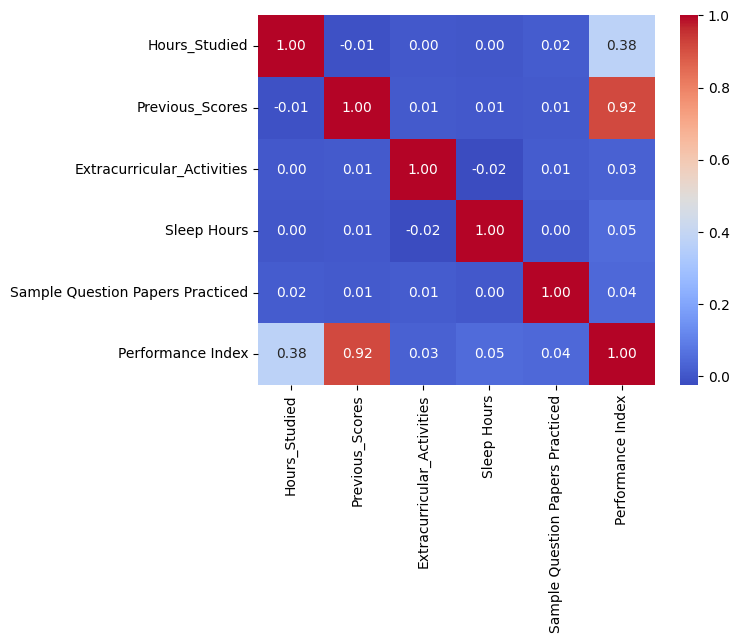

In [18]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix , annot = True , cmap = 'coolwarm' , fmt=".2f")
plt.show()

In [21]:
X= df['Previous_Scores']
Y= df['Performance Index']

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.25)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(X_train.values.reshape(-1,1),Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
y_pred = lr.predict(X_test.values.reshape(-1,1))

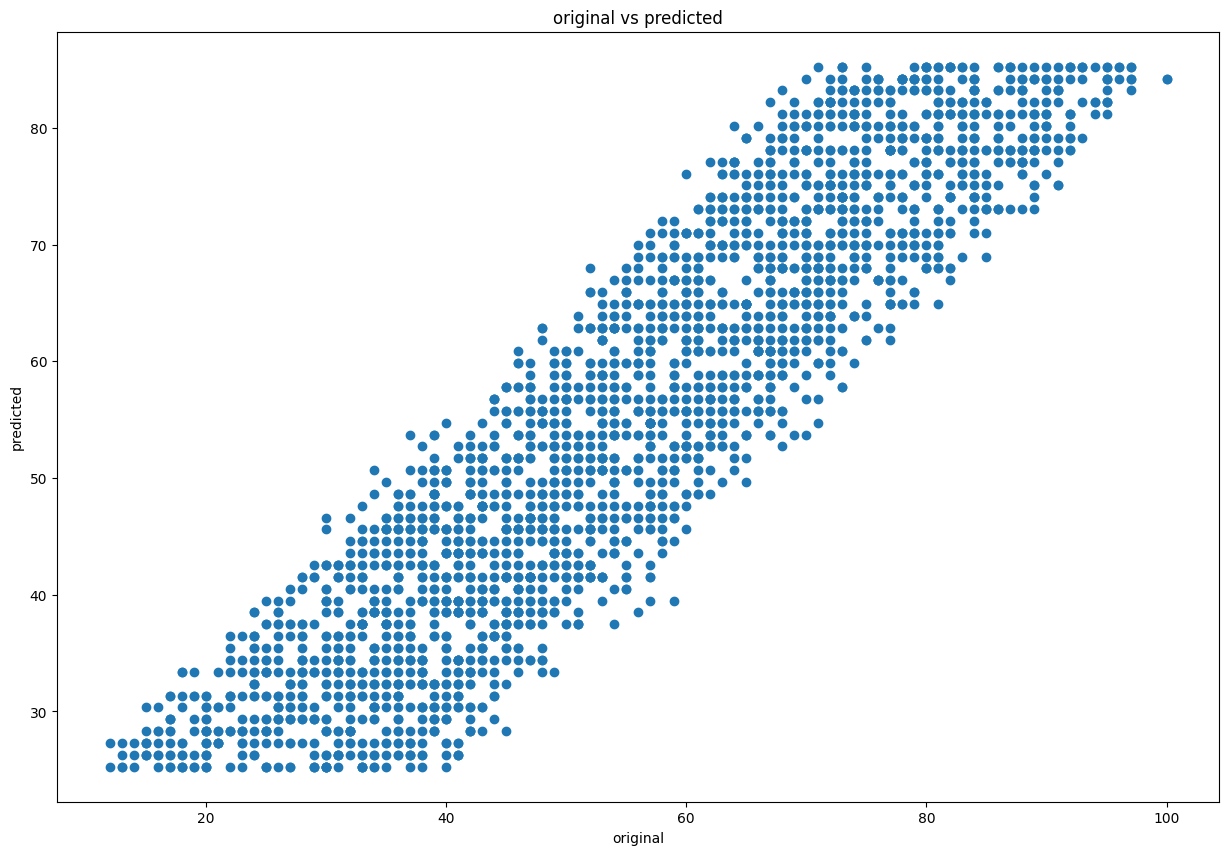

In [27]:
plt.figure(figsize = (15, 10))
plt.scatter(Y_test , y_pred)
plt.xlabel('original')
plt.ylabel('predicted')
plt.title('original vs predicted')
plt.show()